In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# 維度縮減
1. 砍掉不適用 
2. 濃縮

## PCA

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()

In [4]:
x = iris.data
y = iris.target

In [5]:
from sklearn.decomposition import PCA

### step 1. 打開一台空的 PCA 機

In [6]:
pca = PCA(n_components=2)

### step 2. 訓練

In [8]:
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### step 3. 預測

In [9]:
x[87]

array([6.3, 2.3, 4.4, 1.3])

In [10]:
X = pca.transform(x) #轉換

In [11]:
X[87]

array([ 0.81509524, -0.37203706])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


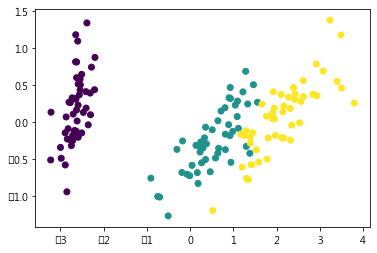

In [12]:
plt.scatter(X[:,0],X[:,1],c=y)

### 準備訓練/測試資料

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=0.2,
                                                   random_state=0)

### step 1. 開 SVC 函數學習機

In [15]:
from sklearn.svm import SVC #SVR做回歸

In [18]:
clf = SVC(gamma='auto')

### STEP 2. 訓練

In [19]:
clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

### step 3. 預測

In [20]:
y_predict = clf.predict(x_test)

In [21]:
y_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


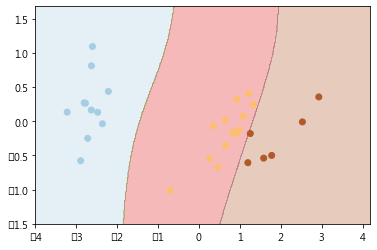

In [23]:
x0 = np.arange(-4,4.2,0.02)
y0 = np.arange(-1.5,1.7,0.02)

xm, ym = np.meshgrid(x0,y0)
P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)
plt.contourf(xm,ym,Z,alpha=0.3, cmap='Paired')
plt.scatter(x_test[:,0],x_test[:,1],c=y_test, cmap='Paired')

# K-Means 自動分類

In [24]:
x = np.random.rand(100,2)

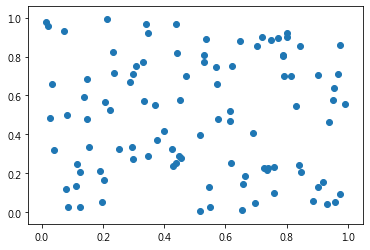

In [25]:
plt.scatter(x[:,0],x[:,1])

### step 1. 打開 K-Means 學習機

In [26]:
from sklearn.cluster import KMeans

In [27]:
clf = KMeans(n_clusters=3) #classified into 3 types

### step 2. 訓練

In [28]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step 3. 預測

In [30]:
clf.predict(x)

array([0, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2])

In [31]:
clf.labels_

array([0, 2, 1, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 2, 1, 2, 2,
       2, 1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 0, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1,
       2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 0, 0,
       2, 2, 1, 1, 2, 0, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 2, 1, 2, 0, 1, 0,
       0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2])

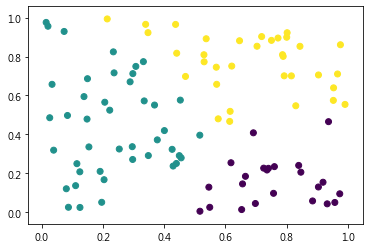

In [32]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


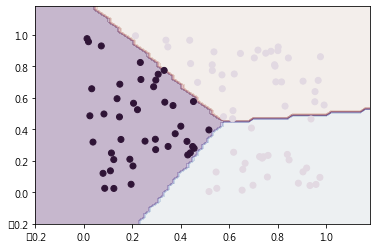

In [39]:
x0 = y0 = np.arange(-0.2,1.2,0.02)
xm, ym = np.meshgrid(x0,y0)

P= np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)

Z = z.reshape(xm.shape)
plt.contourf(xm, ym, Z, alpha=0.3, cmap='twilight')
plt.scatter(x[:,0],x[:,1],c=clf.labels_, cmap='twilight')

##  'make_blobs' 更像真實世界數據

In [41]:
from sklearn.datasets.samples_generator import make_blobs

In [42]:
x,y =make_blobs(n_samples=500, centers=3,
               n_features=2,
               random_state=0)

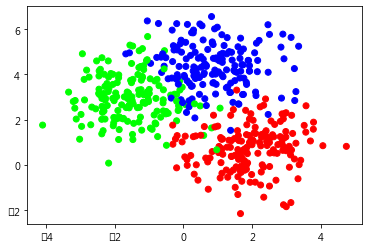

In [44]:
plt.scatter(x[:,0],x[:,1],c=y, cmap='brg')

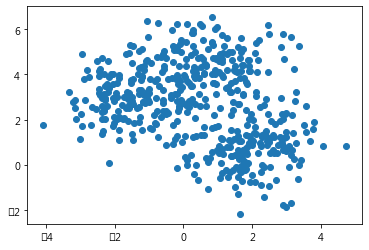

In [48]:
plt.scatter(x[:,0],x[:,1])

### step 1. 打開 K-Means 函數學習機

In [49]:
clf = KMeans(n_clusters=3)

### step 2. 訓練

In [50]:
clf.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### step 3. 預測

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


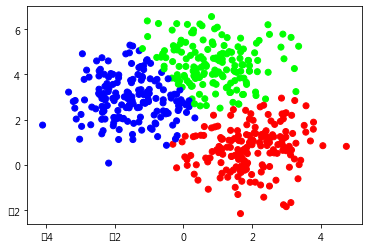

In [51]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_,cmap='brg')

### Mean Shift 完全自動分類（連分幾類都不知道）

### step 1. 打開函數學習機

In [52]:
from sklearn.cluster import MeanShift

In [58]:
clf = MeanShift(bandwidth=0.2) #bandwidth 分群大小

### step 2. 訓練

In [59]:
clf.fit(x)

MeanShift(bandwidth=0.2, bin_seeding=False, cluster_all=True, min_bin_freq=1,
          n_jobs=None, seeds=None)

### step 3. 預測（結果）

In [60]:
clf.labels_

array([  0, 105, 106,  50,  73,   0, 190,  38, 101,  87, 109,  75, 107,
        35,  22,  56,  77, 128,  23,  17, 143,  16,   6,  41,  88,  99,
        16, 204,  65,   9,  98,  81,  66, 104,   1, 197,   6, 130,  13,
       196,  26,  15, 121,  28,  43,  93,  14, 157,  10, 224,   2,  46,
        63,  18, 221, 106, 181,  53, 167,  61, 119,  69,  13, 176,  80,
       232, 169,   8,  20,  18,  23,  63, 193,  41, 113,  38,  30,  51,
        32, 126, 151,  57,  25,   2, 112,  45,  26,  74,  35,  27,  33,
        15, 116,  70,  34,   4, 215,  22,  69,  65, 115,  27, 231,  17,
        62,  64,   0, 120,  48,   1,  59,  59,  58,  69,   3,  54,  75,
        29,   1,  99,   3, 125,  67, 223,  25,  52,  10, 165, 200, 182,
         6,  49,  40,   1,  22,  29,  26,  42, 168,  56, 142,  36,  42,
       137,  50,  94,  19, 144,  84, 180,   6, 186, 203,  86,  78,  57,
        34, 184,  97, 178,  11, 179, 219,  74,  10,  44,   2,   5, 202,
        12,  37,  41,   4,  31,  48,  72,  10,   1, 162, 164,  1

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


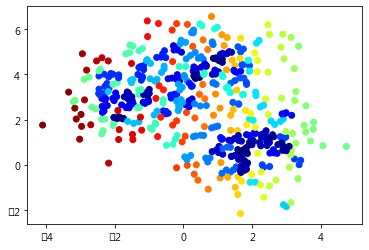

In [61]:
plt.scatter(x[:,0],x[:,1],c=clf.labels_, cmap='jet')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


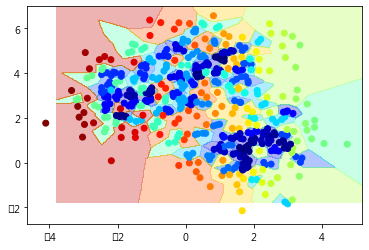

In [62]:
x0 = np.arange(-3.8,5.2,0.02)
y0 = np.arange(-1.8,7,0.02)

xm, ym = np.meshgrid(x0,y0)

P = np.c_[xm.ravel(),ym.ravel()]
z = clf.predict(P)
Z = z.reshape(xm.shape)

plt.contourf(xm,ym,Z,alpha=0.3,cmap='jet')
plt.scatter(x[:,0],x[:,1],c=clf.labels_, cmap='jet')

## cross_val_score

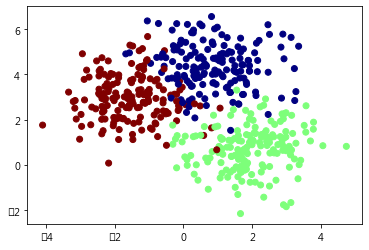

In [64]:
plt.scatter(x[:,0],x[:,1], c=y, cmap='jet')

In [65]:
from sklearn.model_selection import cross_val_score

### SVC

In [66]:
from sklearn.svm import SVC

In [67]:
clf = SVC(gamma='auto')

In [68]:
scores = cross_val_score(clf,x,y,cv=5) #切 5 次

In [69]:
scores

array([0.94117647, 0.94059406, 0.98989899, 0.90909091, 0.92929293])

In [70]:
scores.max()

0.98989898989899

In [71]:
scores.mean()

0.9420106716554008

### Decision Tree 決策樹

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
clf = DecisionTreeClassifier()

In [76]:
scores=cross_val_score(clf,x,y,cv=5)

In [77]:
scores

array([0.91176471, 0.89108911, 0.94949495, 0.8989899 , 0.88888889])

In [78]:
scores.max()

0.9494949494949495

In [79]:
scores.mean()

0.9080455104333964

### Random Forest

In [80]:
from sklearn.ensemble import RandomForestClassifier #會製造出很多棵樹

In [81]:
clf = RandomForestClassifier(n_estimators=100)

In [82]:
scores = cross_val_score(clf, x, y, cv=5)

In [83]:
scores

array([0.92156863, 0.93069307, 0.96969697, 0.8989899 , 0.88888889])

In [84]:
scores.max()

0.9696969696969697

In [85]:
scores.mean()

0.9219674908667337